In [1]:
#data analysis
import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

#machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
card = pd.read_csv('creditcard.csv')

In [3]:
card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
card['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

#### **Percebemos no countplot abaixo dados muito desbalanceados, com muitas leituras com resultado negativo, desproporcional com os dados em que foi registrada uma efetiva fraude no cartão. Vamos usar um metodo de UnderSampling para igualar os valores positivos e negativos**

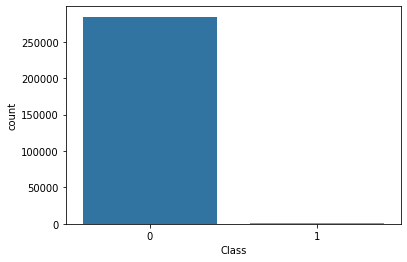

In [6]:
sns.countplot(card['Class'])

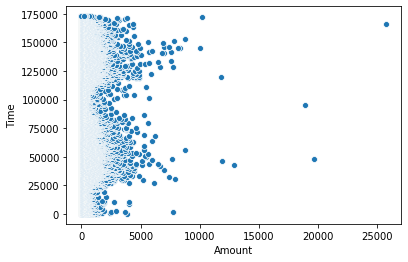

In [7]:
sns.scatterplot('Amount', 'Time', data=card, palette='viridis')

In [8]:
X = card.drop('Class', axis=1)
y = card['Class']

In [9]:
rus = RandomUnderSampler()

In [10]:
X_res, y_res = rus.fit_resample(X, y)

In [11]:
X_res.shape

(984, 30)

In [12]:
y_res.shape

(984,)

In [13]:
df = pd.concat([X_res, y_res], axis=1)

In [14]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,40264.0,0.970627,-0.279871,-0.600938,0.740517,0.491856,0.423255,0.353138,-0.049912,-0.252042,...,0.081699,-0.136565,-0.491701,-1.364349,0.837146,-0.259770,-0.023747,0.025482,187.00,0
1,38363.0,-1.725166,-0.471781,1.529308,-1.377077,0.771124,-0.940124,0.131756,-0.379571,-0.960230,...,-0.098996,0.006400,-0.440607,0.056772,0.388423,-0.416933,-0.482808,0.113676,44.99,0
2,143789.0,-0.620111,1.266977,-0.855460,-0.774696,1.211608,0.229271,0.722908,0.345100,0.023995,...,0.000592,0.264416,-0.365906,-0.388118,-0.097156,0.554532,-0.052936,-0.043239,19.99,0
3,87329.0,-1.269455,0.058290,-1.415106,-2.398445,1.411355,-1.860281,0.792773,0.163857,0.110417,...,0.292088,0.701260,-0.383958,-0.384885,-0.373866,0.529371,0.117579,0.076107,1.00,0
4,57381.0,0.736022,-0.559744,-0.138791,1.524676,-0.355671,-0.340474,0.445512,-0.068794,0.262177,...,0.118406,-0.080323,-0.307862,0.071531,0.625638,-0.251570,-0.029669,0.048477,241.38,0


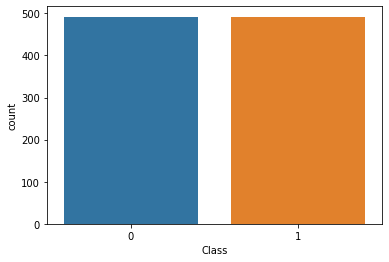

In [15]:
sns.countplot(df['Class'])

In [16]:
corr = df.corr()

In [17]:
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.226496,-0.218918,0.133004,-0.187145,0.273841,0.084969,0.200857,-0.134002,0.130458,...,-0.057768,0.125350,0.045930,-0.001340,-0.207978,-0.021653,-0.152502,-0.006379,0.033830,-0.117574
V1,0.226496,1.000000,-0.814011,0.884292,-0.624013,0.859881,0.324492,0.889631,-0.075232,0.673827,...,0.016781,-0.041403,-0.042898,-0.057824,-0.066858,0.048111,0.191094,0.184587,-0.035341,-0.444793
V2,-0.218918,-0.814011,1.000000,-0.857265,0.689455,-0.795621,-0.268091,-0.850253,-0.031434,-0.702191,...,0.027236,-0.001563,0.151651,-0.017393,0.081110,-0.018713,-0.154807,0.016148,-0.239291,0.487728
V3,0.133004,0.884292,-0.857265,1.000000,-0.764288,0.850438,0.463609,0.887049,-0.165777,0.765411,...,0.028217,-0.056775,-0.030594,0.026421,-0.072645,-0.009686,0.104348,0.125557,-0.020290,-0.562590
V4,-0.187145,-0.624013,0.689455,-0.764288,1.000000,-0.577757,-0.422815,-0.702544,0.110063,-0.788641,...,-0.014368,0.091641,0.031424,-0.090876,-0.038982,0.120487,-0.005368,-0.063044,0.000176,0.699099
V5,0.273841,0.859881,-0.795621,0.850438,-0.577757,1.000000,0.301186,0.837437,-0.203760,0.662127,...,0.038981,-0.082364,-0.090739,-0.119107,-0.078322,0.062911,0.182767,0.162889,-0.104775,-0.379082
V6,0.084969,0.324492,-0.268091,0.463609,-0.422815,0.301186,1.000000,0.274673,-0.551842,0.376992,...,0.006511,0.021547,0.313876,-0.013808,-0.122875,-0.024072,-0.169358,-0.037855,0.104225,-0.410585
V7,0.200857,0.889631,-0.850253,0.887049,-0.702544,0.837437,0.274673,1.000000,0.100578,0.760757,...,0.053247,-0.122084,-0.087391,-0.034463,0.062535,0.025353,0.233610,0.141696,0.117216,-0.466819
V8,-0.134002,-0.075232,-0.031434,-0.165777,0.110063,-0.203760,-0.551842,0.100578,1.000000,-0.066779,...,-0.076864,0.004681,-0.402441,0.067271,0.240571,0.042703,0.295165,-0.014687,0.026613,0.063195
V9,0.130458,0.673827,-0.702191,0.765411,-0.788641,0.662127,0.376992,0.760757,-0.066779,1.000000,...,0.165263,-0.229816,-0.052603,0.028230,0.011971,-0.115206,0.135159,0.137792,0.011284,-0.545519


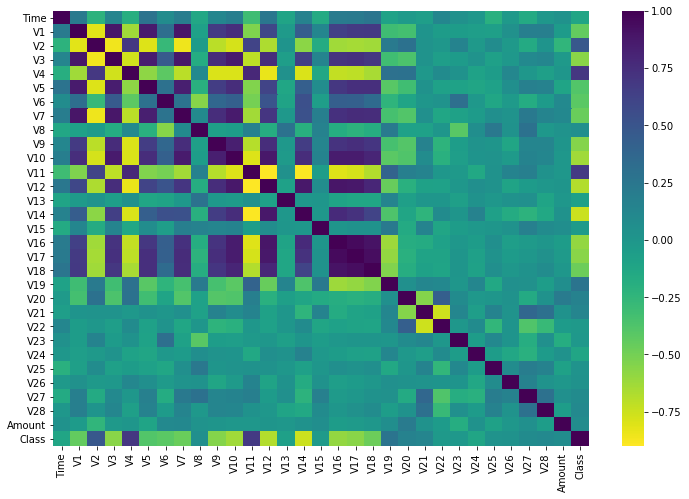

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='viridis_r')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3)

In [20]:
lg = LogisticRegression().fit(X_train, y_train)

In [21]:
pred_lg = lg.predict(X_test)

In [22]:
print(classification_report(pred_lg, y_test))
print()
print('Score: ', accuracy_score(pred_lg, y_test))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       166
           1       0.87      0.96      0.92       130

    accuracy                           0.92       296
   macro avg       0.92      0.93      0.92       296
weighted avg       0.93      0.92      0.92       296


Score:  0.9222972972972973


In [23]:
rfc = RandomForestClassifier(n_estimators=400)

In [24]:
forest_boosted = AdaBoostClassifier(base_estimator=rfc, n_estimators=400, learning_rate=0.01)
forest_boosted.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                       

In [25]:
pred_boosted = forest_boosted.predict(X_test)

In [26]:
print(classification_report(pred_boosted, y_test))
print()
print('Score: ', accuracy_score(pred_boosted, y_test))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       162
           1       0.90      0.96      0.92       134

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296


Score:  0.9290540540540541


#### Usando Cross Validation

In [27]:
lg_score = np.mean(cross_val_score(LogisticRegression(), X_res, y_res, cv=10))

lg_pred = cross_val_predict(LogisticRegression(), X_res, y_res, cv=10)

In [28]:
#Random Forest boosting
forest = RandomForestClassifier(n_estimators=400)
forest_score = np.mean(cross_val_score(AdaBoostClassifier(base_estimator=forest, learning_rate=0.01), 
                               X_res, y_res, cv=10))

In [29]:
#SVM tunning

svm_score = np.mean(cross_val_score(SVC(), X_res, y_res, cv=3))

In [30]:
#KNN tunning
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

knn = KNeighborsClassifier()

knn_tunned = GridSearchCV(estimator=knn, param_grid=hyperparameters, cv=5)
knn_tunned.fit(X_train, y_train)
knn_pred = knn_tunned.predict(X_test)
knn_score = accuracy_score(knn_pred, y_test)

In [31]:
bnb_score = np.mean(cross_val_score(BernoulliNB(binarize=0.0), X_res, y_res, cv=10))

In [32]:
gnb_score = np.mean(cross_val_score(GaussianNB(), X_res, y_res, cv=10))

In [36]:
score = [lg_score, forest_score, svm_score, knn_score, bnb_score, gnb_score]
models = ['LogisticRegression', 'RandomForest', 'SVM', 'KNNeighbours', 'BernoulliNB', 'GaussianNB']

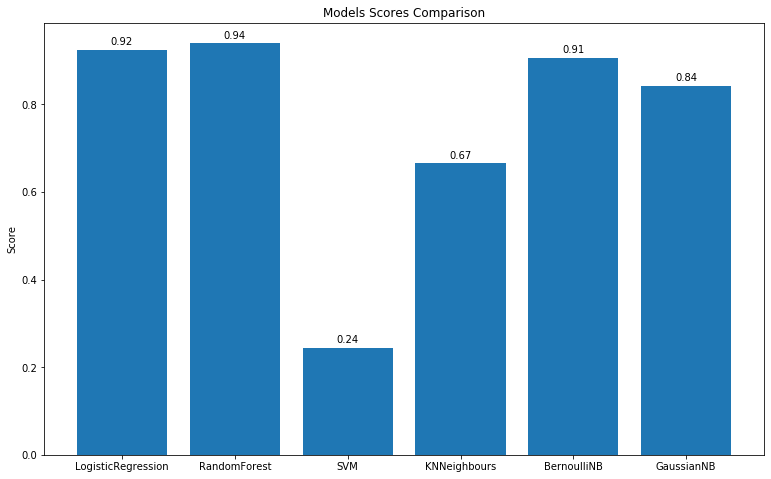

In [37]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0,0,1,1])
rects = ax.bar(models, score)
ax.set_title('Models Scores Comparison')
ax.set_ylabel('Score')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{round(height, 2)}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects)